In [3]:
import sqlite3

[Documentation](https://docs.python.org/3/library/sqlite3.html)

![](https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

Chinook sample database tables

There are 11 tables in the chinook sample database.

- `employees` table stores employees data such as employee id, last name, first name, etc. It also has a field named `ReportsTo` to specify who reports to whom.
- `customers` table stores customers data.
- `invoices` & `invoice_items` tables: these two tables store invoice data. The `invoices` table stores invoice header data and the `invoice_items` table stores the invoice line items data.
- `artists` table stores artists data. It is a simple table that contains only the artist id and name.
- `albums` table stores data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.
- `media_types` table stores media types such as MPEG audio and AAC audio files.
- `genres` table stores music types such as rock, jazz, metal, etc.
- `tracks` table stores the data of songs. Each track belongs to one album.
- `playlists` & `playlist_track` tables: playlists table store data about playlists. Each playlist contains a list of tracks. Each track may belong to multiple playlists. The relationship between the `playlists` table and `tracks table` is many-to-many. The `playlist_track` table is used to reflect this relationship.

## Connect to db

In [9]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        print(cursor.fetchall())
        print(sqlite3.version)
    except sqlite3.Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

In [10]:
create_connection("../data/chinook.db")

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]
2.6.0


In [11]:
create_connection(":memory:")

[]
2.6.0


The `connect()` function opens a connection to an SQLite database. It returns a `Connection` object that represents the database. By using the `Connection` object, you can perform various database operations.

## Create tables

To create a new table in an SQLite database from a Python program, you use the following steps:

1. First, create a `Connection` object using the `connect()` function of the sqlite3 module.
1. Second, create a `Cursor` object by calling the `cursor()` method of the Connection object.
1. Third, pass the `CREATE TABLE` statement to the `execute()` method of the `Cursor` object and execute this method

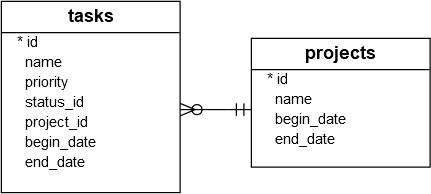

The following CREATE TABLE statements create these two tables:

```SQL
-- projects table
CREATE TABLE IF NOT EXISTS projects (
	id integer PRIMARY KEY,
	name text NOT NULL,
	begin_date text,
	end_date text
);

-- tasks table
CREATE TABLE IF NOT EXISTS tasks (
	id integer PRIMARY KEY,
	name text NOT NULL,
	priority integer,
	project_id integer NOT NULL,
	status_id integer NOT NULL,
	begin_date text NOT NULL,
	end_date text NOT NULL,
	FOREIGN KEY (project_id) REFERENCES projects (id)
);
```

In [12]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [13]:
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [14]:
database = "../data/chinook.db"

sql_create_projects_table = """
CREATE TABLE IF NOT EXISTS projects (
    id integer PRIMARY KEY,
    name text NOT NULL,
    begin_date text,
    end_date text
); """

sql_create_tasks_table = """
CREATE TABLE IF NOT EXISTS tasks (
    id integer PRIMARY KEY,
    name text NOT NULL,
    priority integer,
    status_id integer NOT NULL,
    project_id integer NOT NULL,
    begin_date text NOT NULL,
    end_date text NOT NULL,
    FOREIGN KEY (project_id) REFERENCES projects (id)
);"""

# create a database connection
conn = create_connection(database)

# create tables
if conn is not None:
    # create projects table
    create_table(conn, sql_create_projects_table)

    # create tasks table
    create_table(conn, sql_create_tasks_table)
else:
    print("Error! cannot create the database connection.")

In [15]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',), ('projects',), ('tasks',)]


## Inserting Data

To insert rows into a table in SQLite database, you use the following steps:

1. First, connect to the SQLite database by creating a `Connection` object.
1. Second, create a `Cursor` object by calling the `cursor` method of the `Connection` object.
1. Third, execute an `INSERT` statement. If you want to pass arguments to the `INSERT` statement, you use the **question mark (?)** as the placeholder for each argument.

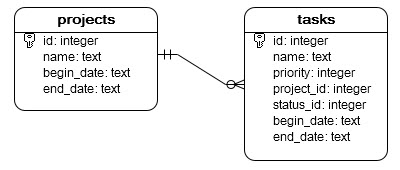

In [16]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [17]:
def create_project(conn, project):
    """
    Create a new project into the projects table
    :param conn:
    :param project:
    :return: project id
    """
    sql = ''' INSERT INTO projects(name, begin_date, end_date)
              VALUES(?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, project)
    conn.commit()
    return cur.lastrowid

In this function, we used the `lastrowid` attribute of the `Cursor` object to get back the generated id.

In [18]:
def create_task(conn, task):
    """
    Create a new task
    :param conn:
    :param task:
    :return:
    """

    sql = ''' INSERT INTO tasks(name,priority,status_id,project_id,begin_date,end_date)
              VALUES(?,?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, task)
    conn.commit()

    return cur.lastrowid

In [20]:
database = "../data/chinook.db"

# create a database connection
conn = create_connection(database)
with conn:
    # create a new project
    project = ('Cool App with SQLite & Python', '2015-01-01', '2015-01-30');
    project_id = create_project(conn, project)
    print(f"Created new project (id={project_id})")

    # tasks
    task_1 = ('Analyze the requirements of the app', 1, 1, project_id, '2015-01-01', '2015-01-02')
    task_2 = ('Confirm with user about the top requirements', 1, 1, project_id, '2015-01-03', '2015-01-05')
    
    # create tasks
    task_id_1 = create_task(conn, task_1)
    task_id_2 = create_task(conn, task_2)
    
    print(f"Created two new tasks (id=[{task_id_1}, {task_id_2}])")

Created new project (id=2)
Created two new tasks (id=[3, 4])


In [21]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM tasks;")
print(cursor.fetchall())

[(1, 'Analyze the requirements of the app', 1, 1, 1, '2015-01-01', '2015-01-02'), (2, 'Confirm with user about the top requirements', 1, 1, 1, '2015-01-03', '2015-01-05'), (3, 'Analyze the requirements of the app', 1, 1, 2, '2015-01-01', '2015-01-02'), (4, 'Confirm with user about the top requirements', 1, 1, 2, '2015-01-03', '2015-01-05')]
